In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras

In [17]:
period_0_train = pd.read_csv('period_0.csv')
period_0_train.isnull().sum()

Age                    0
Seniority              0
Orders                 0
Items                  0
AverageDiscount        0
TopCategory            0
BrowsingTime           0
EmailsOpened           0
SupportInteractions    0
TotalCart              0
dtype: int64

In [18]:
y_train = period_0_train.iloc[:,9]
period_0_train.drop(period_0_train.columns[9], axis = 1, inplace = True)

In [19]:
period_0_train.head()

,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions
0,21,2,4,7,0.14,"Clothing,Shoes & Jewelry",68.473629,3,2
1,22,0,4,5,0.50,Toys & Games,29.258063,1,0
2,22,1,2,6,0.37,"Health, Household & Baby Care",11.515517,0,0
3,19,0,2,8,0.60,Toys & Games,74.495861,1,0
4,25,1,1,5,0.58,Toys & Games,1.682705,2,1


In [20]:
y_train.head()

0    34.00
1    28.28
2    19.33
3    26.83
4    17.67
Name: TotalCart, dtype: float64

In [21]:
period_1_test = pd.read_csv('period_1.csv')
y_test_1 = period_1_test.iloc[:,9]
period_1_test.drop(period_1_test.columns[9], axis = 1, inplace = True)

In [22]:
period_2_test = pd.read_csv('period_2.csv')
y_test_2 = period_2_test.iloc[:,9]
period_2_test.drop(period_2_test.columns[9], axis = 1, inplace = True)

In [23]:
period_3_test = pd.read_csv('period_3.csv')
y_test_3 = period_3_test.iloc[:,9]
period_3_test.drop(period_3_test.columns[9], axis = 1, inplace = True)

In [24]:
period_0_train['TopCategory'].unique()

array(['Clothing,Shoes & Jewelry', 'Toys & Games',
       'Health, Household & Baby Care', 'Electronics', 'Home & Kitchen',
       'Pet Supplies', 'Beauty & Personal Care', 'Sports & outdoors',
       'Office Supplies'], dtype=object)

In [25]:
period_0_train = pd.get_dummies(period_0_train)
period_0_train

,Age,Seniority,Orders,Items,AverageDiscount,BrowsingTime,EmailsOpened,SupportInteractions,TopCategory_Beauty & Personal Care,"TopCategory_Clothing,Shoes & Jewelry",TopCategory_Electronics,"TopCategory_Health, Household & Baby Care",TopCategory_Home & Kitchen,TopCategory_Office Supplies,TopCategory_Pet Supplies,TopCategory_Sports & outdoors,TopCategory_Toys & Games
0,21,2,4,7,0.14,68.473629,3,2,0,1,0,0,0,0,0,0,0
1,22,0,4,5,0.50,29.258063,1,0,0,0,0,0,0,0,0,0,1
2,22,1,2,6,0.37,11.515517,0,0,0,0,0,1,0,0,0,0,0
3,19,0,2,8,0.60,74.495861,1,0,0,0,0,0,0,0,0,0,1
4,25,1,1,5,0.58,1.682705,2,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,27,0,6,9,0.67,86.664343,1,1,0,1,0,0,0,0,0,0,0
996,30,0,4,7,0.40,365.542532,2,2,0,0,0,1,0,0,0,0,0
997,30,0,5,5,0.46,252.582605,0,0,1,0,0,0,0,0,0,0,0
998,23,0,1,8,0.66,3.329596,0,0,0,0,0,0,0,0,0,0,1


In [26]:
period_0_train.describe()

,Age,Seniority,Orders,Items,AverageDiscount,BrowsingTime,EmailsOpened,SupportInteractions,TopCategory_Beauty & Personal Care,"TopCategory_Clothing,Shoes & Jewelry",TopCategory_Electronics,"TopCategory_Health, Household & Baby Care",TopCategory_Home & Kitchen,TopCategory_Office Supplies,TopCategory_Pet Supplies,TopCategory_Sports & outdoors,TopCategory_Toys & Games
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.06900,0.508000,3.011000,5.975000,0.371700,97.949068,0.989000,1.012000,0.259000,0.227000,0.049000,0.099000,0.167000,0.003000,0.009000,0.016000,0.171000
std,5.05943,0.720038,1.731438,2.399194,0.219133,100.222845,1.002938,1.022204,0.438305,0.419102,0.215976,0.298811,0.373162,0.054717,0.094488,0.125538,0.376697
min,7.00000,0.000000,0.000000,1.000000,0.000000,0.012724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.00000,0.000000,2.000000,4.000000,0.180000,29.333357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.00000,0.000000,3.000000,6.000000,0.380000,68.037177,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.00000,1.000000,4.000000,7.000000,0.560000,127.063901,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.00000,4.000000,9.000000,15.000000,0.750000,831.026761,5.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
period_0_train = preprocessing.StandardScaler().fit_transform(period_0_train)

In [28]:
period_1_test = pd.get_dummies(period_1_test)
period_1_test = preprocessing.StandardScaler().fit_transform(period_1_test)

In [29]:
period_2_test = pd.get_dummies(period_2_test)
period_2_test = preprocessing.StandardScaler().fit_transform(period_2_test)

In [30]:
period_3_test = pd.get_dummies(period_3_test)
period_3_test = preprocessing.StandardScaler().fit_transform(period_3_test)

In [31]:
reg_lin_alg = LinearRegression()
reg_lin_alg_mod = reg_lin_alg.fit(period_0_train, y_train)
reg_lin_alg_mod

LinearRegression()

In [32]:
period_1_test_pred = reg_lin_alg_mod.predict(period_1_test)
print(period_1_test_pred.shape)

(1000,)


In [33]:
print(y_test_1.shape)

(1000,)


In [34]:
period_2_test_pred = reg_lin_alg_mod.predict(period_2_test)
period_3_test_pred = reg_lin_alg_mod.predict(period_3_test)

In [35]:
reg_lin_alg_score_1 = reg_lin_alg_mod.score(period_1_test, y_test_1)
taux_reg_lin_alg_score_1 = round(reg_lin_alg_score_1*100,2)
print("Taux de prédictions correctes sur le semestre 2 pour la régression linéaire : ", taux_reg_lin_alg_score_1)

Taux de prédictions correctes sur le semestre 2 pour la régression linéaire :  76.56


In [36]:
reg_lin_alg_score_2 = reg_lin_alg_mod.score(period_2_test, y_test_2)
taux_reg_lin_alg_score_2 = round(reg_lin_alg_score_2*100,2)
print("Taux de prédictions correctes sur le semestre 3 pour la régression linéaire : ", taux_reg_lin_alg_score_2)

Taux de prédictions correctes sur le semestre 3 pour la régression linéaire :  71.88


In [37]:
reg_lin_alg_score_3 = reg_lin_alg_mod.score(period_3_test, y_test_3)
taux_reg_lin_alg_score_3 = round(reg_lin_alg_score_3*100,2)
print("Taux de prédictions correctes sur le semestre 4 pour la régression linéaire : ", taux_reg_lin_alg_score_3)

Taux de prédictions correctes sur le semestre 4 pour la régression linéaire :  58.12


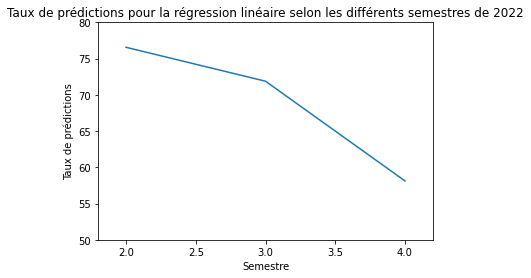

In [38]:
plt.plot([2, 3, 4], [taux_reg_lin_alg_score_1, taux_reg_lin_alg_score_2, taux_reg_lin_alg_score_3])
plt.gca().set_xlim([1.8,4.2])
plt.gca().set_ylim([50,80])
plt.xlabel('Semestre')
plt.ylabel("Taux de prédictions")
plt.title("Taux de prédictions pour la régression linéaire selon les différents semestres de 2022")
plt.show()

In [39]:
period_0_train.shape

(1000, 17)

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape = period_0_train.shape[1]))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(60, activation = "relu"))
model.add(keras.layers.Dense(30, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "relu"))
model.add(keras.layers.Dense(1))

In [41]:
model.compile(loss = "mse", optimizer = "rmsprop", metrics = ["mae"])

In [42]:
results1 = model.fit(period_0_train, y_train, epochs = 70, validation_split = 0.3)

Train on 700 samples, validate on 300 samples
Epoch 1/70
700/700 [==============================] - 1s 1ms/sample - loss: 1542.6041 - mae: 35.1359 - val_loss: 1409.8810 - val_mae: 33.6374
Epoch 2/70
700/700 [==============================] - 0s 160us/sample - loss: 1352.6048 - mae: 32.6249 - val_loss: 1200.7461 - val_mae: 30.7332
Epoch 3/70
700/700 [==============================] - 0s 146us/sample - loss: 1067.8474 - mae: 28.4851 - val_loss: 907.0133 - val_mae: 26.1101
Epoch 4/70
700/700 [==============================] - 0s 125us/sample - loss: 737.3338 - mae: 22.6424 - val_loss: 580.4832 - val_mae: 19.8815
Epoch 5/70
700/700 [==============================] - 0s 135us/sample - loss: 444.6624 - mae: 16.5784 - val_loss: 346.0941 - val_mae: 14.3348
Epoch 6/70
700/700 [==============================] - 0s 251us/sample - loss: 315.9005 - mae: 12.8182 - val_loss: 235.2267 - val_mae: 11.1922
Epoch 7/70
700/700 [==============================] - 0s 283us/sample - loss: 274.2883 - mae: 11.66

Epoch 59/70
700/700 [==============================] - 0s 251us/sample - loss: 134.8029 - mae: 6.9401 - val_loss: 82.5518 - val_mae: 6.0022
Epoch 60/70
700/700 [==============================] - 0s 241us/sample - loss: 169.1181 - mae: 7.6378 - val_loss: 84.6216 - val_mae: 5.9809
Epoch 61/70
700/700 [==============================] - 0s 223us/sample - loss: 153.5201 - mae: 7.6341 - val_loss: 90.2774 - val_mae: 6.4260
Epoch 62/70
700/700 [==============================] - 0s 233us/sample - loss: 153.2625 - mae: 7.6981 - val_loss: 90.6570 - val_mae: 6.5468
Epoch 63/70
700/700 [==============================] - 0s 174us/sample - loss: 117.7530 - mae: 7.0959 - val_loss: 72.5033 - val_mae: 5.4192
Epoch 64/70
700/700 [==============================] - 0s 128us/sample - loss: 160.8108 - mae: 7.7064 - val_loss: 84.5139 - val_mae: 6.1456
Epoch 65/70
700/700 [==============================] - 0s 122us/sample - loss: 158.5836 - mae: 7.7619 - val_loss: 80.1012 - val_mae: 5.7681
Epoch 66/70
700/700 

C:\Users\doria\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


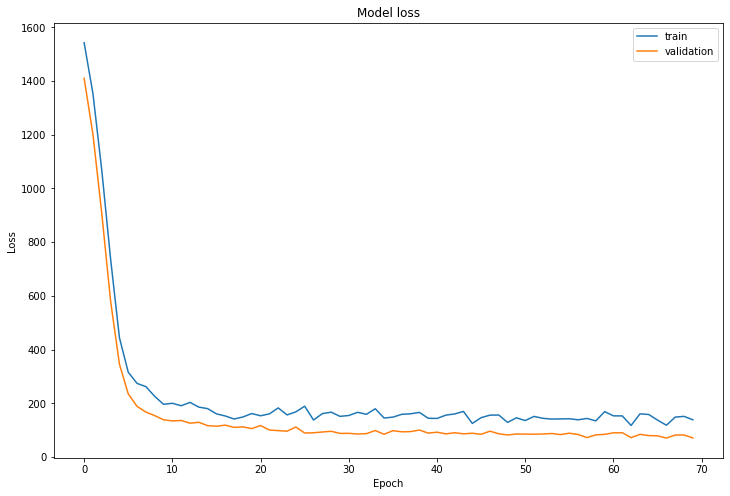

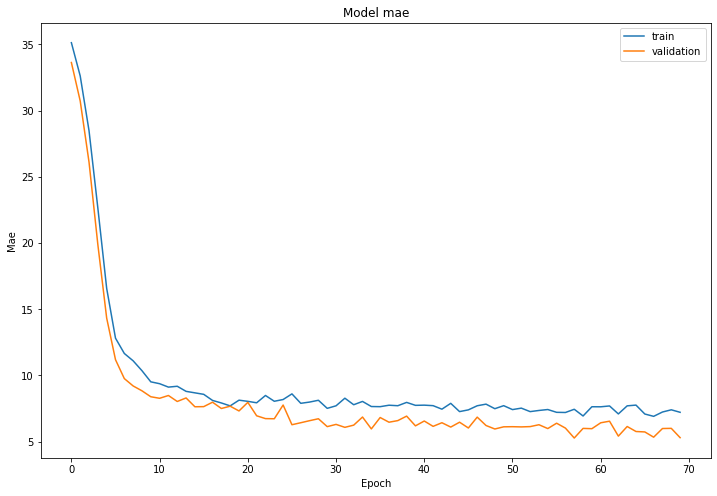

In [43]:
df_loss_mae = pd.DataFrame(results1.history)
df_loss= df_loss_mae[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_mae= df_loss_mae[['mae','val_mae']]
df_mae.rename(columns={'mae':'train','val_mae':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
plt.show()
df_mae.plot(title='Model mae',figsize=(12,8)).set(xlabel='Epoch',ylabel='Mae')
plt.show()

In [44]:
score_period_1 = model.evaluate(period_1_test, y_test_1)
print(score_period_1)

1000/1000 [==============================] - 0s 57us/sample - loss: 109.7308 - mae: 8.0241
[109.73075695800782, 8.024084]


In [45]:
score_period_2 = model.evaluate(period_2_test, y_test_2)
print(score_period_2)

1000/1000 [==============================] - 0s 67us/sample - loss: 133.6669 - mae: 8.9974
[133.666873046875, 8.997439]


In [46]:
score_period_3 = model.evaluate(period_3_test, y_test_3)
print(score_period_3)

1000/1000 [==============================] - 0s 65us/sample - loss: 262.3921 - mae: 13.0124
[262.3920573730469, 13.012435]


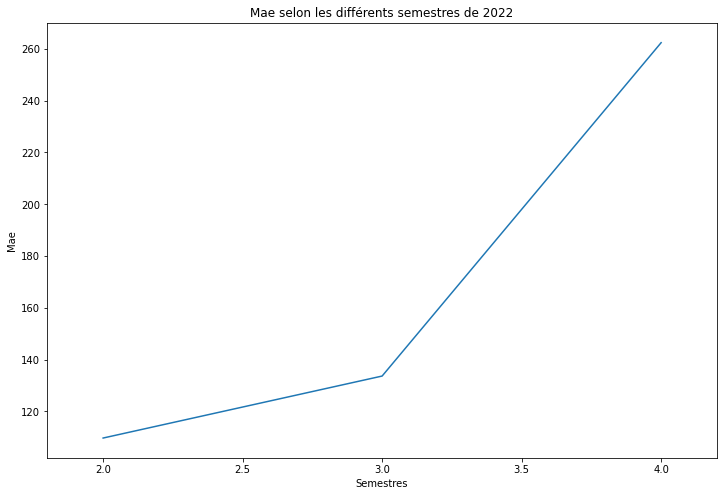

In [47]:
plt.figure(figsize=(12,8))
plt.plot([2, 3, 4], [score_period_1[0], score_period_2[0], score_period_3[0]])
plt.gca().set_xlim([1.8,4.2])
plt.xlabel('Semestres')
plt.ylabel("Mae")
plt.title("Mae selon les différents semestres de 2022")
plt.show()

In [48]:
import numpy as np 

P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])

def KLDivergence(P, Q):
    
    d_kl = np.dot(P, np.log(np.divide(P,Q)))
    
    return d_kl

def JSDivergence(P, Q):
    
    d_js = 1/2 * KLDivergence(P, 1/2*(P+Q)) + 1/2 * KLDivergence(Q, 1/2*(P+Q))
    
    return d_js

In [72]:
print("K-L Divergence:", KLDivergence(P, Q))
print("J-S Divergence:", JSDivergence(P, Q))

K-L Divergence: 0.02526715392157057
J-S Divergence: 0.006367198333995731


In [49]:
def WassersteinDistance(X, Y, p):
    
    d_w = np.power(np.divide(1, Y.shape[0]) * np.linalg.norm(X-Y, p), 1/p)
    
    return d_w

In [50]:
X = np.random.beta(2, 6, 100)

Y = np.random.beta(3, 6, 100)

WassersteinDistance(X, Y, 2)

0.1528412096458498

In [110]:
eps = 0.0001
y1 = y_test_1.replace(0, eps, inplace = False) 
y2 = y_test_2.replace(0, eps, inplace = False)
y3 = y_test_3.replace(0, eps, inplace = False)

In [117]:
KLDivergence(y1, period_1_test_pred)

-3945.933699889231

In [121]:
y1[4]

0.0001

In [119]:
period_1_test_pred

array([ 20.79554633,  30.65020018,  66.29420816,  73.16454714,
        37.72993112,  28.6877148 ,  46.65705907,  37.73520048,
        13.36203948,  46.19224553,  39.68111652,  34.32278032,
        36.11437535,  13.18911821,  33.36274988,  44.28510772,
        37.86600264,  41.42689745,  27.07612279,  63.09955292,
        25.23111165,  13.81191718,  11.76667697,  36.47245125,
        47.9205988 ,  24.11805487,  65.30170215,  33.48079319,
        27.12463233,  31.0557585 ,  36.16861305,  16.25061891,
        45.67369955,  37.29389714,  35.07241205,  42.08183892,
        16.47196946,  57.58820295,  34.37213325,  16.67940174,
        32.26194842,  32.19977191,  50.22273064,  41.43294359,
        27.27216598,  11.57929872,  24.73748474,  13.25243229,
        45.12465247,  50.4924917 ,  21.28784325,  19.5404471 ,
        57.94229745,  23.28217116,  53.87177507,  17.39978706,
        39.7532545 ,  47.4755966 ,  53.43865829,  41.27042653,
        14.47357757,  37.96195369,  27.52053232,  23.03

In [112]:
KLDivergence(y2, period_2_test_pred)

-4155.150280889961

In [113]:
KLDivergence(y3, period_3_test_pred)

-4370.852387736524

In [114]:
JSDivergence(y1, period_1_test_pred)

644.6119466130647

In [115]:
JSDivergence(y2, period_2_test_pred)

882.1973275622388

In [116]:
JSDivergence(y3, period_3_test_pred)

1717.5776668311214

In [73]:
WassersteinDistance(y_test_1, period_1_test_pred, 2)

0.5364028105090036

In [75]:
WassersteinDistance(y_test_2, period_2_test_pred, 2)

0.5727708331879058

In [76]:
WassersteinDistance(y_test_3, period_3_test_pred, 2)

0.6917731456763292